<a href="https://colab.research.google.com/github/SamH3pn3r/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Copy_of_Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

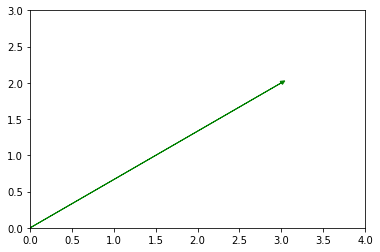

In [1]:
import matplotlib.pyplot as plt

plt.xlim(0,4)
plt.ylim(0, 3)
plt.arrow(0, 0, 3, 2, head_width=.05, head_length=.05, color = 'g');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
import numpy as np

In [3]:
b = np.array([17,-4,-2,1])
norm = np.linalg.norm(b)

print("Norm of b:", norm)

Norm of b: 17.60681686165901


The norm of a vector represents the length of the vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

dotted = np.dot(c, d)
print("c*d: ", dotted)

c*d:  42


These vectors are not orthogonal since their dot product does not equal 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
inverse = np.linalg.inv(E)
transpose = np.transpose(E)

print("The inverse of E:", inverse)
print()
print("The transpose of E:", transpose)

The inverse of E: [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

The transpose of E: [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [20]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
df.describe()

In [0]:
# Printing the mean, variance, and standard deviation of customers and snow
cust_mean = sum(customers)/len(customers)
snow_mean = sum(snow)/len(snow)
print("The customer's mean:", cust_mean)
print("The snow mean:", snow_mean)
print()
cust_var = np.var(customers)
snow_var = np.var(snow)
print("The variance of the customers:", cust_var)
print("The variance of snow:", snow_var)
print()
cust_std = np.std(customers)
snow_std = np.std(snow)
print("The standard deviation of the customers", cust_std)
print("The standard deviation of the snow", snow_std)

In [0]:
#Double checking the variance
var_cust = sum((xi - cust_mean) ** 2 for xi in customers) / len(customers)
var_cust

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, because customers goes from 760 to 1600 and snow goes from 0 to 7. This is a large difference between the two columns.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [21]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


##2.4 What are Eigenvalues and Eigenvectors?

An eigenvector is a vector that when a linear transformation is applied to it, it only gets scaled by the eigenvalue. Of course, the eigenvector should be non-zero.

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [42]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

new_df = df.drop(columns='Country')
features = new_df.columns

x = new_df.loc[:,features].values

y = StandardScaler().fit_transform(x)

In [38]:
# Checking to make sure y was scaled
print("Scaled y:", y)
print()
print(sum(y)/len(y))

Scaled y: [[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.93889390e-18 -5.55111512e-17  0.00000000e+00  5.55111512e-17
  0.00000000e+00

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [40]:
pca = PCA(2)
pca.fit(y)

B = pca.transform(y)

pcaDf = pd.DataFrame(data = B, columns=['PC1','PC2'])
pcaDf

,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


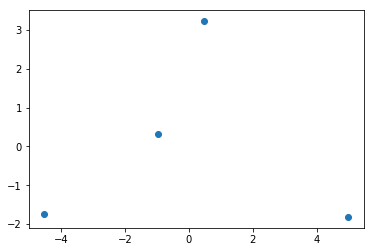

In [43]:
plt.scatter(B[:,0],B[:,1]);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't clustering.

Prioritize calculating the clusters over graphing them, but graph them as well if you have time.

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [51]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans

In [0]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(points)
  sum_of_squared_distances.append(km.inertia_)

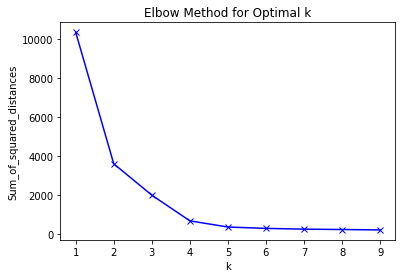

In [48]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[0 3 3 0 3 3 0 0 1 3 3 3 3 3 0 3 0 3 3 2 0 2 2 2 3 3 3 1 3 3 3 3 3 2 3 3 3
 3 1 3 3 2 1 1 1 3 3 3 0 3 2 0 0 1 2 3 3 1 1 0 2 3 0 1 2 1 2 1 0 1 3 3 3 3
 2 2 3 3 1 2 1 3 3 3 1 3 1 3 3 2 1 3 2 3 3 3 3 3 3 3 3 3 0 3 3 2 0 0 0 2 3
 2 3 0 3 3 1 1 2 1 2 3 3 0 3 0 3 2 1 0 3 0 3 0 1 1 3 2 0 3 1 3 3 2 3 1 3 1
 0 3 3 3 0 2 3 1 3 2 3 0 3 3 1 0 2 2 3 1 3 3 0 3 1 2 3 3 3 3 3 0 3 3 3 3 3
 3 0 2 1 3 3 0 2 0 3 1 2 2 3 3]


In [61]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,0
1,-3.554323,-6.884729,3
2,-0.192822,-9.671030,3
3,-6.401456,-5.223972,0
4,-0.804026,-9.704457,3


In [0]:
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2, 3])] * df.shape[0]
  df_temp = df.copy()
  i=0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))
      
    distances = cdist(df_temp[['x','y']], centroids[['x','y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean(), df.x[df[column_header]==3].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean(), df.y[df[column_header]==3].mean()]
  data = {'x':x, 'y':y}
  return pd.DataFrame(data)

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'blue', 1:'magenta', 2:'red', 3:'black'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label = key, color = colors[key])
  plt.show()

In [70]:
centroids = get_centroids(points, 'clusters')
centroids

,x,y
0,-8.366530,-3.612381
1,-3.597407,4.133441
2,6.249793,3.844572
3,-2.733593,-8.204353


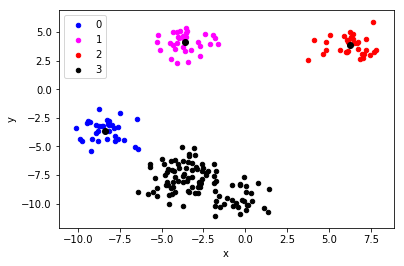

In [71]:
plot_clusters(points, 'clusters', centroids)